In [91]:
import pathlib

import numpy as np
import scipy
import matplotlib.pyplot as plt
import polars as pl


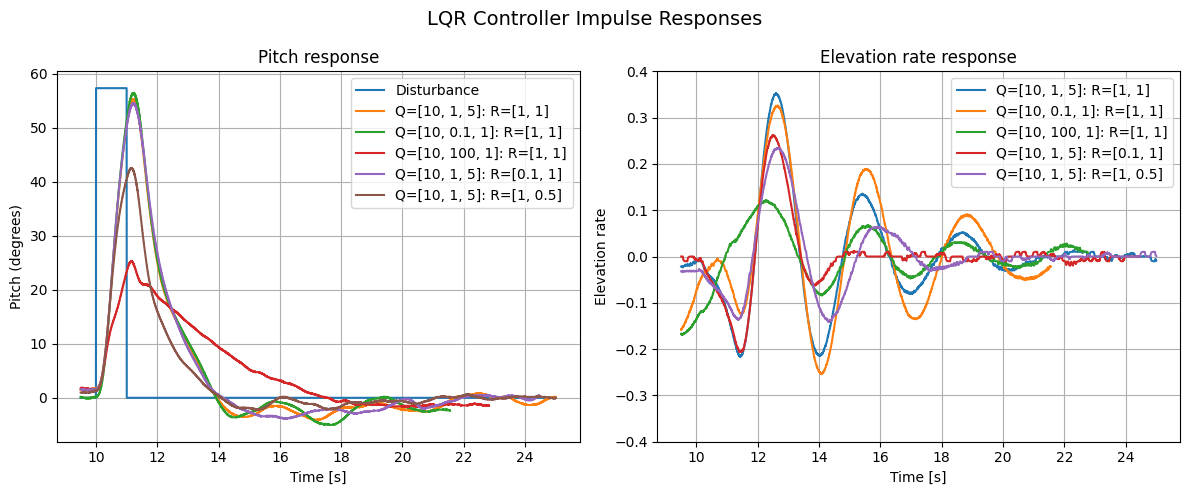

In [ ]:
def load_from_mat(
    file_path: str, start_time: float = 0, end_time: float = float("inf")
) -> pl.DataFrame:
    mat = scipy.io.loadmat(file_path)
    ts = mat["ans"]

    df = pl.DataFrame(
        {
            "time": ts[0, :],
            "travel": ts[1, :],
            "travel_rate": ts[2, :],
            "pitch": ts[3, :],
            "pitch_rate": ts[4, :],
            "elevation": ts[5, :],
            "elevation_rate": ts[6, :],
            "joystick_x": ts[7, :],
            "joystick_y": ts[8, :],
        }
    )

    df = df.with_columns(
        pl.when((pl.col("time") >= 10) & (pl.col("time") <= 11))
        .then(1)
        .otherwise(0)
        .alias("disturbance"),
        pl.col("elevation_rate").rolling_mean(window_size=75).alias("elevation_roll"),
    )

    return df.filter((pl.col("time") >= start_time) & (pl.col("time") <= end_time))


start_time = 9.5
end_time = 25

filename = "data/2_lqr/{}.mat"

data_1 = load_from_mat(filename.format(1), start_time, end_time)
data_2 = load_from_mat(filename.format(2), start_time, end_time)
data_3 = load_from_mat(filename.format(3), start_time, end_time)
data_4 = load_from_mat(filename.format(4), start_time, end_time)
data_5 = load_from_mat(filename.format(5), start_time, end_time)

rtd = 180 / np.pi  # radians to degrees

# Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# --- Left subplot: Pitch ---
ax1.plot(data_1["time"], data_1["disturbance"] * rtd, label="Disturbance")
ax1.plot(data_1["time"], data_1["pitch"] * rtd, label="Q=[10, 1, 5]: R=[1, 1]")
ax1.plot(data_2["time"], data_2["pitch"] * rtd, label="Q=[10, 0.1, 1]: R=[1, 1]")
ax1.plot(data_3["time"], data_3["pitch"] * rtd, label="Q=[10, 100, 1]: R=[1, 1]")
ax1.plot(data_4["time"], data_4["pitch"] * rtd, label="Q=[10, 1, 5]: R=[0.1, 1]")
ax1.plot(data_5["time"], data_5["pitch"] * rtd, label="Q=[10, 1, 5]: R=[1, 0.5]")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Pitch (degrees)")
ax1.set_title("Pitch response")
ax1.legend()
ax1.grid(True)

# --- Right subplot: Elevation ---
ax2.plot(data_1["time"], data_1["elevation_roll"], label="Q=[10, 1, 5]: R=[1, 1]")
ax2.plot(data_2["time"], data_2["elevation_roll"], label="Q=[10, 0.1, 1]: R=[1, 1]")
ax2.plot(data_3["time"], data_3["elevation_roll"], label="Q=[10, 100, 1]: R=[1, 1]")
ax2.plot(data_4["time"], data_4["elevation_roll"], label="Q=[10, 1, 5]: R=[0.1, 1]")
ax2.plot(data_5["time"], data_5["elevation_roll"], label="Q=[10, 1, 5]: R=[1, 0.5]")
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Elevation rate")
ax2.set_title("Elevation rate response")
ax2.legend()
ax2.set_ylim(-0.4, 0.4)
ax2.grid(True)

plt.suptitle("LQR Controller Impulse Responses", fontsize=14)
plt.tight_layout()
plt.show()

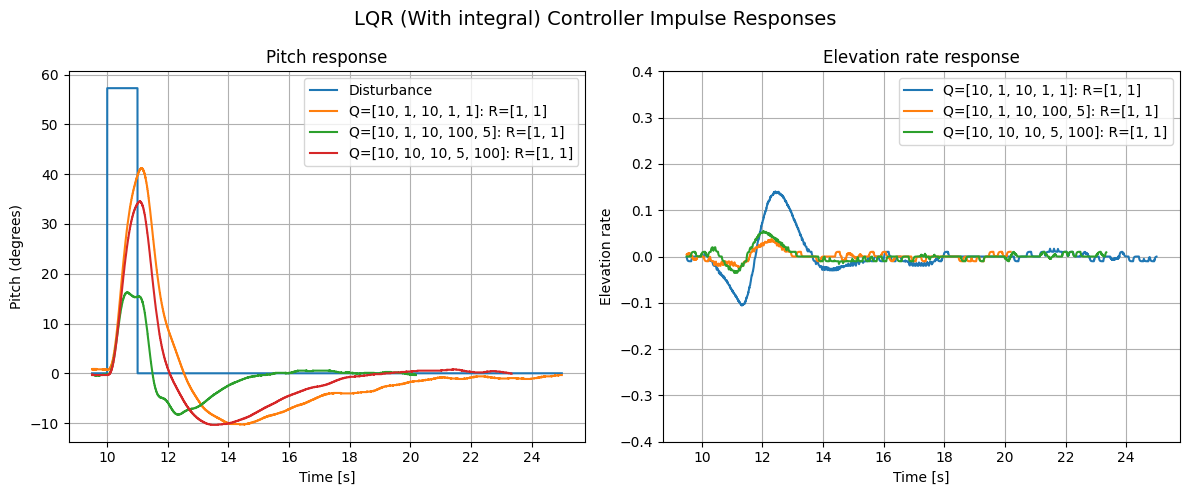

In [99]:
def load_from_mat(
    file_path: str, start_time: float = 0, end_time: float = float("inf")
) -> pl.DataFrame:
    mat = scipy.io.loadmat(file_path)
    ts = mat["ans"]

    df = pl.DataFrame(
        {
            "time": ts[0, :],
            "travel": ts[1, :],
            "travel_rate": ts[2, :],
            "pitch": ts[3, :],
            "pitch_rate": ts[4, :],
            "elevation": ts[5, :],
            "elevation_rate": ts[6, :],
            "joystick_x": ts[7, :],
            "joystick_y": ts[8, :],
        }
    )

    df = df.with_columns(
        pl.when((pl.col("time") >= 10) & (pl.col("time") <= 11))
        .then(1)
        .otherwise(0)
        .alias("disturbance"),
        pl.col("elevation_rate").rolling_mean(window_size=75).alias("elevation_roll"),
    )

    return df.filter((pl.col("time") >= start_time) & (pl.col("time") <= end_time))


start_time = 9.5
end_time = 25

filename = "data/2_lqr_integral/{}.mat"

data_6 = load_from_mat(filename.format(6), start_time, end_time)
data_7 = load_from_mat(filename.format(7), start_time, end_time)
data_8 = load_from_mat(filename.format(8), start_time, end_time)

rtd = 180 / np.pi  # radians to degrees

# Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# --- Left subplot: Pitch ---
ax1.plot(data_6["time"], data_6["disturbance"] * rtd, label="Disturbance")
ax1.plot(data_6["time"], data_6["pitch"] * rtd, label="Q=[10, 1, 10, 1, 1]: R=[1, 1]")
ax1.plot(data_7["time"], data_7["pitch"] * rtd, label="Q=[10, 1, 10, 100, 5]: R=[1, 1]")
ax1.plot(
    data_8["time"], data_8["pitch"] * rtd, label="Q=[10, 10, 10, 5, 100]: R=[1, 1]"
)
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Pitch (degrees)")
ax1.set_title("Pitch response")
ax1.legend()
ax1.grid(True)

# --- Right subplot: Elevation ---
ax2.plot(
    data_6["time"], data_6["elevation_roll"], label="Q=[10, 1, 10, 1, 1]: R=[1, 1]"
)
ax2.plot(
    data_7["time"], data_7["elevation_roll"], label="Q=[10, 1, 10, 100, 5]: R=[1, 1]"
)
ax2.plot(
    data_8["time"], data_8["elevation_roll"], label="Q=[10, 10, 10, 5, 100]: R=[1, 1]"
)
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Elevation rate")
ax2.set_title("Elevation rate response")
ax2.legend()
ax2.set_ylim(-0.4, 0.4)
ax2.grid(True)

plt.suptitle("LQR (With integral) Controller Impulse Responses", fontsize=14)
plt.tight_layout()
plt.show()

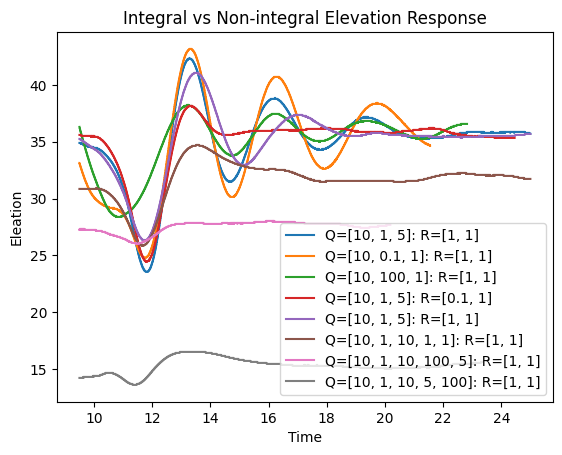

In [94]:
def load_from_mat(
    file_path: str, start_time: float = 0, end_time: float = float("inf")
) -> pl.DataFrame:
    mat = scipy.io.loadmat(file_path)
    ts = mat["ans"]

    df = pl.DataFrame(
        {
            "time": ts[0, :],
            "travel": ts[1, :],
            "travel_rate": ts[2, :],
            "pitch": ts[3, :],
            "pitch_rate": ts[4, :],
            "elevation": ts[5, :],
            "elevation_rate": ts[6, :],
            "joystick_x": ts[7, :],
            "joystick_y": ts[8, :],
        }
    )

    df = df.with_columns(
        pl.when((pl.col("time") >= 10) & (pl.col("time") <= 11))
        .then(1)
        .otherwise(0)
        .alias("disturbance"),
    )

    return df.filter((pl.col("time") >= start_time) & (pl.col("time") <= end_time))


start_time = 9.5
end_time = 25

filename = "data/2_lqr/{}.mat"
filename2 = "data/2_lqr_integral/{}.mat"

data_1 = load_from_mat(filename.format(1), start_time, end_time)
data_2 = load_from_mat(filename.format(2), start_time, end_time)
data_3 = load_from_mat(filename.format(3), start_time, end_time)
data_4 = load_from_mat(filename.format(4), start_time, end_time)
data_5 = load_from_mat(filename.format(5), start_time, end_time)
data_6 = load_from_mat(filename2.format(6), start_time, end_time)
data_7 = load_from_mat(filename2.format(7), start_time, end_time)
data_8 = load_from_mat(filename2.format(8), start_time, end_time)

rtd = 180 / np.pi  # radians to degrees

plt.figure()
plt.plot(data_1["time"], data_1["elevation"] * rtd, label="Q=[10, 1, 5]: R=[1, 1]")
plt.plot(data_2["time"], data_2["elevation"] * rtd, label="Q=[10, 0.1, 1]: R=[1, 1]")
plt.plot(data_3["time"], data_3["elevation"] * rtd, label="Q=[10, 100, 1]: R=[1, 1]")
plt.plot(data_4["time"], data_4["elevation"] * rtd, label="Q=[10, 1, 5]: R=[0.1, 1]")
plt.plot(data_5["time"], data_5["elevation"] * rtd, label="Q=[10, 1, 5]: R=[1, 1]")
plt.plot(
    data_6["time"], data_6["elevation"] * rtd, label="Q=[10, 1, 10, 1, 1]: R=[1, 1]"
)
plt.plot(
    data_7["time"], data_7["elevation"] * rtd, label="Q=[10, 1, 10, 100, 5]: R=[1, 1]"
)
plt.plot(
    data_8["time"], data_8["elevation"] * rtd, label="Q=[10, 1, 10, 5, 100]: R=[1, 1]"
)
plt.xlabel("Time")
plt.ylabel("Eleation")
plt.title("Integral vs Non-integral Elevation Response")
plt.legend()
plt.show()